## Observations and Insights

## Dependencies and starter code

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

table_df = merged_df.groupby('Drug Regimen')
tumor_volume = table_df.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
tumor_volume

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0.5, 1.0, 'Data Points Per Drug Treatment Regimen')

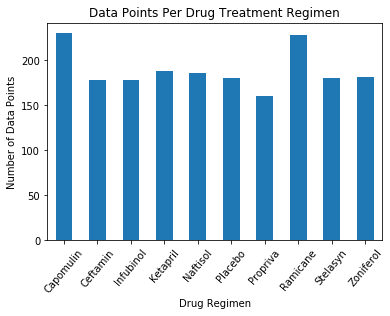

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_plots = merged_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_plots2 = pd.DataFrame(bar_plots)
bar_plots2.head()

plots = bar_plots2.plot.bar(legend=False,rot=50)
plots
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")


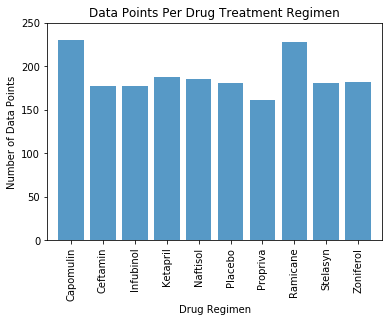

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(bar_plots))
tick_location = [x for x in x_axis]


reset2 = bar_plots2.reset_index()
reset2


plt.bar(x_axis, bar_plots2['Tumor Volume (mm3)'], alpha=0.75, align="center")
plt.xticks(tick_location, reset2['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(bar_plots)-.25)
plt.ylim(0, 250)

plt.title("Data Points Per Drug Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.savefig('barplot2')
plt.show()


## Pie plots

C:\Users\Choi9\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


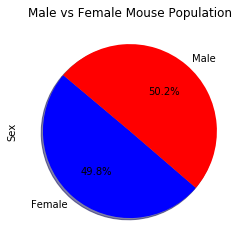

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = mouse_metadata.groupby("Sex").count()
groupby_gender

sex_label = [mouse_metadata['Sex'].unique()]

sexlist = list(groupby_gender.index)
sexlist

sizes = [groupby_gender["Mouse ID"]]
sizes

colors = ['blue', 'red']

plt.pie(sizes, labels=sexlist, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.savefig('piechart1')
plt.show()

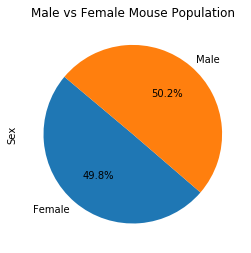

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


pypie = groupby_gender["Mouse ID"].plot.pie(y='sizes', figsize=(4, 5), autopct="%1.1f%%",startangle=140)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.show()

## Quartiles, outliers and boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

regimens = merged_df[merged_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
regimens = regimens.sort_values(["Timepoint"], ascending=True)
regimens

regimens_data = regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

regimens_data


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


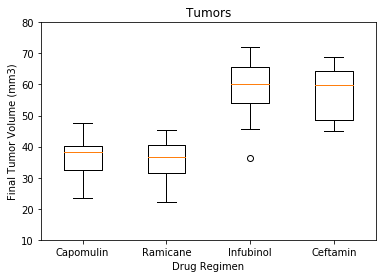

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regimens_sort = regimens_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
regimen_df = regimens_sort.to_frame()
regimen_df

#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)

plt.title('Tumors')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

plt.show()



## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

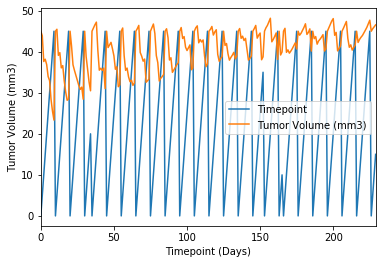

In [57]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tvst = merged_df[merged_df["Drug Regimen"].isin(["Capomulin"])]
tvst

tvst_data = tvst[["Timepoint", "Tumor Volume (mm3)"]]
tvst_data

tvst_data_plot = tvst_data.reset_index()
tvst_data_plot


tvst_data_fin = tvst_data_plot[["Timepoint", "Tumor Volume (mm3)"]]
tvst_data_fin



lines = tvst_data_fin.plot.line()
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

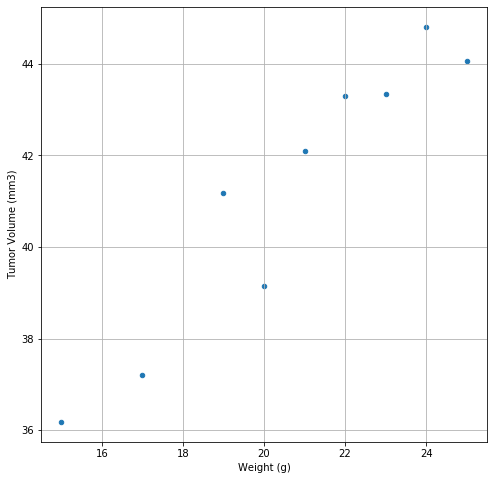

In [60]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_scatter = merged_df[merged_df["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = regimens[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_sorted = capomulin_scatter_df.sort_values(["Weight (g)"], ascending=True)

capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))


In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


...... Skip cannot do 